# directed part demo

## create function

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import copy


def sign_network_positive_swap(G0, nswap=1, max_tries=100):    
    """正边随机断边重连零模型函数
    
    输入：
        G0: 原始网络模型
        nswap: 断边交换次数
        max_tries：最大尝试次数
        
    输出：
        G：按要求断边重连1阶零模型
    """
    
    G = copy.deepcopy(G0)  # 深层次拷贝，不会产生任何映射
    n = 0
    swapcount = 0      
    a = dict(G.degree())  # 形成所有节点-度字典
    keys, degrees = zip(*a.items()) 
    cdf = nx.utils.cumulative_distribution(degrees)  # 由degrees求取cdf
        
    while swapcount < nswap:
        (ui, xi) = nx.utils.discrete_sequence(2, cdistribution=cdf)
        
        if ui == xi:
            continue  # 来源相同，跳过
        
        u = keys[ui]  # 转换索引标签
        x = keys[xi]
        
        # 从相邻中统一选择目标
        if len(list(G[u])) > 0 and len(list(G[x])) > 0:
            v = random.choice(list(G[u]))
            y = random.choice(list(G[x]))
            if v == y:
                continue
        else:
            continue
        
        # 该部分进行断边交换重连
        if ((x not in G[u]) and (y not in G[v]) and G[u][v]['weight'] == 1 
            and G[x][y]['weight'] == 1):
            if (((u in G[x]) and (G[x][u]['weight'] == 2)) or 
                ((v in G[y]) and (G[y][v]['weight'] == 2))):
                continue
            else:
                G.add_edge(u, x, weight=1)
                G.add_edge(v, y, weight=1)
                G.remove_edge(u, v)
                G.remove_edge(x, y)
                swapcount += 1
       
        if n >= max_tries:
            e = ('Maximum number of swap attempts (%s) exceeded '%n 
               + 'before desired swaps achieved (%s).'%nswap)
            print(nx.NetworkXAlgorithmError(e))
            break
        
        n += 1
        
        if n%100000 == 0:
            print('swap times=', swapcount, 'try times=', n)
    
    return G


def sign_network_negative_swap(G0, nswap=1, max_tries=100):    
    """负边随机断边重连零模型函数
    
    输入：
        G0: 原始网络模型
        nswap: 断边交换次数
        max_tries：最大尝试次数
        
    输出：
        G：按要求断边重连1阶零模型
    """
    
    G = copy.deepcopy(G0)  # 深层次拷贝，不会产生任何映射
    n = 0
    swapcount = 0
    a = dict(G.degree())  # 形成所有节点-度字典
    keys, degrees = zip(*a.items()) 
    cdf = nx.utils.cumulative_distribution(degrees)  # 由degrees求取cdf
         
    while swapcount < nswap:
        (ui, xi) = nx.utils.discrete_sequence(2, cdistribution=cdf)
        
        if ui == xi:
            continue  # 来源相同，跳过
        
        u = keys[ui]  # 转换索引标签
        x = keys[xi]
       
        # 从相邻中统一选择目标
        if len(list(G[u])) > 0 and len(list(G[x])) > 0:
            v = random.choice(list(G[u]))
            y = random.choice(list(G[x]))
            if v == y:
                continue
        else:
            continue
        
        # 该部分进行断边交换重连
        if ((x not in G[u]) and (y not in G[v]) and G[u][v]['weight'] == 2 
            and G[x][y]['weight'] == 2):
            if (((u in G[x]) and (G[x][u]['weight'] == 1)) or 
                ((v in G[y]) and (G[y][v]['weight'] == 1))):
                continue
            else:
                G.add_edge(u,x,weight = 2)
                G.add_edge(v,y,weight = 2)
                G.remove_edge(u, v)
                G.remove_edge(x, y)
                swapcount += 1
       
        if n >= max_tries:
            e = ('Maximum number of swap attempts (%s) exceeded '%n 
               + 'before desired swaps achieved (%s).'%nswap)
            print(nx.NetworkXAlgorithmError(e))
            break
        
        n += 1
        
        if n%100000 == 0:
            print('swap times=', swapcount, 'try times=', n)
   
    return G


def sign_network_swap(G0, nswap=1, max_tries=100, paradox='false'):    
    """正负边分别随机断边重连零模型函数
    
    输入：
        G0: 原始网络模型
        nswap: 断边交换次数
        max_tries：最大尝试次数
        
    输出：
        G：按要求断边重连1阶零模型
    """
    
    G = copy.deepcopy(G0)  # 深层次拷贝，不会产生任何映射
    n = 0
    swapcount = 0
    a = dict(G.degree())  # 形成所有节点-度字典
    keys, degrees = zip(*a.items()) 
    cdf = nx.utils.cumulative_distribution(degrees)  # 由degrees求取cdf
    
    while swapcount < nswap:
        (ui, xi) = nx.utils.discrete_sequence(2, cdistribution=cdf)
    
        if ui == xi:
            continue  # 来源相同，跳过
        
        u = keys[ui]  # 转换索引标签
        x = keys[xi]
        
        # 从相邻中统一选择目标
        if len(list(G[u])) > 0 and len(list(G[x])) > 0:
            v = random.choice(list(G[u]))
            y = random.choice(list(G[x]))
            if v == y:
                continue
        else:
            continue
        
        # 该部分进行断边交换重连
        if ((paradox.lower() == 'true' and (u in G[v])) or 
            (paradox.lower() == 'true' and (x in G[y]))):
                continue
        else:
            G[u][v]['weight']
            G[x][y]['weight'] = G[x][y]['weight']
            G[u][v]['weight']
            if G[u][v]['weight'] != G[x][y]['weight']:
                swapcount += 1
                
        if n >= max_tries:
            e = ('Maximum number of swap attempts (%s) exceeded '%n 
                 + 'before desired swaps achieved (%s).'%nswap)
            print(nx.NetworkXAlgorithmError(e))
            break
        
        n += 1
        
        if n%1000000 == 0:
            print('swap times=', swapcount, 'try times=', n)
    
    return G


def sign_network_full_swap(G0, nswap=1, max_tries=100):    
    """正负边完全随机断边重连零模型函数
    
    输入：
        G0: 原始网络模型
        nswap: 断边交换次数
        max_tries：最大尝试次数
        
    输出：
        G：按要求断边重连1阶零模型
    """
    
    G = copy.deepcopy(G0)  # 深层次拷贝，不会产生任何映射
    n = 0
    swapcount = 0
    a = dict(G.degree())  # 形成所有节点-度字典
    keys, degrees = zip(*a.items()) 
    cdf = nx.utils.cumulative_distribution(degrees)  # 由degrees求取cdf
        
    while swapcount < nswap:
        (ui, xi) = nx.utils.discrete_sequence(2, cdistribution=cdf)
        if ui == xi:
            continue  # 来源相同，跳过
        
        u = keys[ui]  # 转换索引标签
        x = keys[xi]
       
        # 从相邻中统一选择目标
        if len(list(G[u])) > 0 and len(list(G[x])) > 0:
            v = random.choice(list(G[u]))
            y = random.choice(list(G[x]))
            if v == y:
                continue
        else:
            continue
        
        # 该部分进行断边交换重连
        if (x not in G[u]) and (y not in G[v]) :
            if (u in G[x]) or (v in G[y]) :
                continue
            else:
                G.add_edge(u, x, weight=G[u][v]['weight'])
                G.add_edge(v, y, weight=G[x][y]['weight'])
                G.remove_edge(u, v)
                G.remove_edge(x, y)
                swapcount += 1
         
        if n >= max_tries:
            e = ('Maximum number of swap attempts (%s) exceeded '%n 
                 + 'before desired swaps achieved (%s).'%nswap)
            print(nx.NetworkXAlgorithmError(e))
            break
        
        n += 1
        
        if n%100000 == 0:
            print('swap times=', swapcount, 'try times=', n)
    
    return G


def sign_network_sign_swap(G0, nswap=1, max_tries=100):    
    """符号随机置乱零模型函数
    
    输入：
        G0: 原始网络模型
        nswap: 断边交换次数
        max_tries：最大尝试次数
        
    输出：
        G：按要求符号置乱的1阶零模型
    """
    
    G = copy.deepcopy(G0)  # 深层次拷贝，不会产生任何映射
    n = 0
    swapcount = 0
    a = dict(G.degree())  # 形成所有节点-度字典
    keys, degrees = zip(*a.items()) 
    cdf = nx.utils.cumulative_distribution(degrees)  # 由degrees求取cdf       
    
    while swapcount < nswap:
        (ui, xi) = nx.utils.discrete_sequence(2, cdistribution=cdf)
        
        if ui == xi:
            continue  # 来源相同，跳过
        
        u = keys[ui]  # 转换索引标签
        x = keys[xi]
        
        # 该部分进行随机选择两条不同的边
        if len(list(G[u])) > 0 and len(list(G[x])) > 0:
            v = random.choice(list(G[u]))
            y = random.choice(list(G[x]))
            if v == y:
                continue
        else:
            continue
               
        # 该部分对边进行随机符号置乱
        if (G.is_directed() and u in G[v]) or (G.is_directed() and x in G[y]):
            continue
        else:
            G[u][v]['weight']
            G[x][y]['weight'] = G[x][y]['weight']
            G[u][v]['weight']
            if G[u][v]['weight'] != G[x][y]['weight']:
                swapcount += 1
        
        if n >= max_tries:
            e = ('Maximum number of swap attempts (%s) exceeded '%n 
                 + 'before desired swaps achieved (%s).'%nswap)
            print(nx.NetworkXAlgorithmError(e))
            break
        
        n += 1
        
        if n%100000 == 0:
            print('swap times=', swapcount, 'try times=', n)
   
    return G

## calculation

In [2]:
# 计算原始网络模型（G0）
G0 = nx.read_edgelist('N46edge.txt', create_using=nx.DiGraph(), nodetype=int, data=(('weight', float),)) 

# 计算基于正边随机断边重连的有向符号网络1阶零模型（G1）
G1 = sign_network_positive_swap(G0, 60000, 100000)    


# 计算基于负边随机断边重连的有向符号网络1阶零模型（G2）
G2 = sign_network_negative_swap(G0, 60000, 100000)  


# 计算基于正负边分别随机断边重连的有向符号网络1阶零模型（G3）
G3 = sign_network_swap(G0, 60000, 100000)    


# 计算基于正负边完全随机断边重连的有向符号网络1阶零模型并（G4）
G4 = sign_network_full_swap(G0, 60000, 100000)    


# 计算基于符号随机置乱的有向符号网络1阶零模型（G5）
G5 = sign_network_sign_swap(G0, 60000, 100000)

swap times= 47979 try times= 100000
Maximum number of swap attempts (100000) exceeded before desired swaps achieved (60000).
swap times= 1100 try times= 100000
Maximum number of swap attempts (100000) exceeded before desired swaps achieved (60000).
Maximum number of swap attempts (100000) exceeded before desired swaps achieved (60000).
swap times= 50150 try times= 100000
Maximum number of swap attempts (100000) exceeded before desired swaps achieved (60000).
swap times= 23503 try times= 100000
Maximum number of swap attempts (100000) exceeded before desired swaps achieved (60000).


## visualization

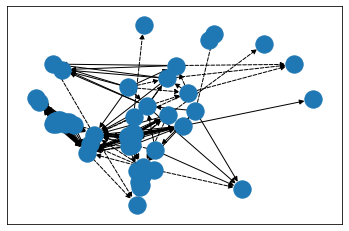

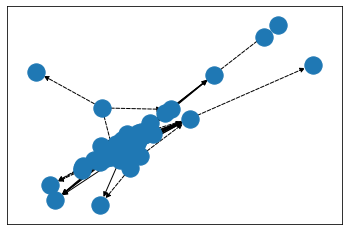

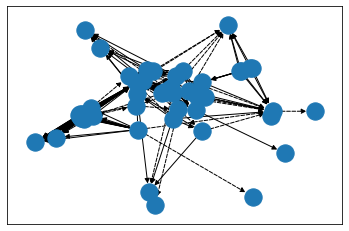

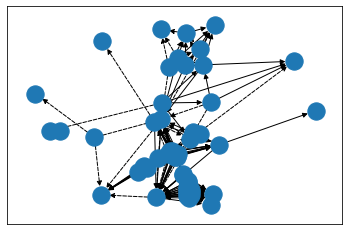

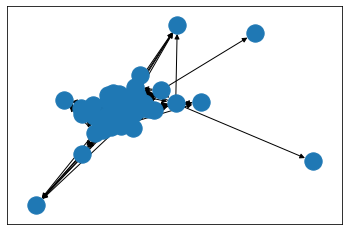

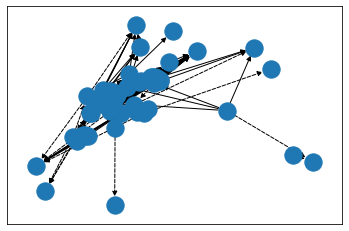

In [3]:
# G0可视化
# 按权重划分为正边和负边
p_edge = [(u, v) for (u, v, d) in G0.edges(data = True) if d['weight'] <= 1]
n_edge = [(u, v) for (u, v, d) in G0.edges(data = True) if d['weight'] > 1]
# 首先画出节点
pos = nx.spring_layout(G0)
nx.draw_networkx_nodes(G0, pos)
# 再分别画出正边和负边
nx.draw_networkx_edges(G0, pos, edgelist = p_edge)
nx.draw_networkx_edges(G0, pos, edgelist = n_edge, style = 'dashed')
plt.show()


# G1可视化
# 按权重划分为正边和负边
p_edge = [(u, v) for (u, v, d) in G1.edges(data = True) if d['weight'] <= 1]
n_edge = [(u, v) for (u, v, d) in G1.edges(data = True) if d['weight'] > 1]
# 首先画出节点
pos = nx.spring_layout(G1)
nx.draw_networkx_nodes(G1, pos)
# 再分别画出正边和负边
nx.draw_networkx_edges(G1, pos, edgelist = p_edge)
nx.draw_networkx_edges(G1, pos, edgelist = n_edge, style = 'dashed')
plt.show()


# G2可视化
# 按权重划分为正边和负边
p_edge = [(u, v) for (u, v, d) in G2.edges(data = True) if d['weight'] <= 1]
n_edge = [(u, v) for (u, v, d) in G2.edges(data = True) if d['weight'] > 1]
# 首先画出节点
pos = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos)
# 再分别画出正边和负边
nx.draw_networkx_edges(G2, pos, edgelist = p_edge)
nx.draw_networkx_edges(G2, pos, edgelist = n_edge, style = 'dashed')
plt.show()  


# G3可视化
# 按权重划分为正边和负边
p_edge = [(u, v) for (u, v, d) in G3.edges(data = True) if d['weight'] <= 1]
n_edge = [(u, v) for (u, v, d) in G3.edges(data = True) if d['weight'] > 1]
# 首先画出节点
pos = nx.spring_layout(G3)
nx.draw_networkx_nodes(G3, pos)
# 再分别画出正边和负边
nx.draw_networkx_edges(G3, pos, edgelist = p_edge)
nx.draw_networkx_edges(G3, pos, edgelist = n_edge, style = 'dashed')
plt.show()


# G4可视化
# 按权重划分为正边和负边
p_edge = [(u, v) for (u, v, d) in G4.edges(data = True) if d['weight'] <= 1]
n_edge = [(u, v) for (u, v, d) in G4.edges(data = True) if d['weight'] > 1]
# 首先画出节点
pos = nx.spring_layout(G4)
nx.draw_networkx_nodes(G4, pos)
# 再分别画出正边和负边
nx.draw_networkx_edges(G4, pos, edgelist = p_edge)
nx.draw_networkx_edges(G4, pos, edgelist = n_edge, style = 'dashed')
plt.show()


# G5可视化
# 按权重划分为正边和负边
p_edge = [(u, v) for (u, v, d) in G5.edges(data = True) if d['weight'] <= 1]
n_edge = [(u, v) for (u, v, d) in G5.edges(data = True) if d['weight'] > 1]
# 首先画出节点
pos = nx.spring_layout(G5)
nx.draw_networkx_nodes(G5, pos)
# 再分别画出正边和负边
nx.draw_networkx_edges(G5, pos, edgelist = p_edge)
nx.draw_networkx_edges(G5, pos, edgelist = n_edge, style = 'dashed')
plt.show()